In [9]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
from matplotlib.pyplot import figure

# Save file path to variable
consolidated_csv = "../Resources/consolidated_tennis.csv"

# Read state population data into a dataset
# # 
consolidated_df = pd.read_csv(consolidated_csv, index_col = 0) #Sets the index at the very first column
consolidated_df.head(2)

consolidated_w_index_df = pd.read_csv(consolidated_csv) #Sets the index at the very first column
consolidated_w_index_df.head(2)


,State,2018 sample size,Well-Being Index,Well-Being Index Rank,Career,Social,Financial,Community,Physical,2018 Population,state_abbreviation,count_public_court_locations,public_courts_per_10000_people,public_courts_rank
0,Hawaii,502,64.6,1,1,1,1,4,4,1426393,hi,91,0.637973,31
1,Wyoming,219,64.2,2,3,18,6,1,3,573720,wy,10,0.174301,42


In [10]:
# For the first example, determine which pairs of factors are correlated. 
#gather wellbeing index rank
ranking_data_df = consolidated_df[['Well-Being Index Rank', 'public_courts_rank']]
ranking_data_df = ranking_data_df.sort_values(by=['Well-Being Index Rank'], ascending=True) #if true, it can be left off, but needs to be there if false
ranking_data_df


,Well-Being Index Rank,public_courts_rank
State,,
Hawaii,1,31
Wyoming,2,42
Alaska,3,32
Montana,4,48
Utah,5,23
Colorado,6,17
Vermont,7,35
Delaware,8,7
South Dakota,9,39


In [11]:
#Reset the index and KEEP the index column

ranking_data_df.reset_index(drop=False, inplace=True)
ranking_data_df



,State,Well-Being Index Rank,public_courts_rank
0,Hawaii,1,31
1,Wyoming,2,42
2,Alaska,3,32
3,Montana,4,48
4,Utah,5,23
5,Colorado,6,17
6,Vermont,7,35
7,Delaware,8,7
8,South Dakota,9,39
9,North Dakota,10,46


Text(0, 0.5, 'Public Tennis Court Availability Rank\n Well-Being Rank')

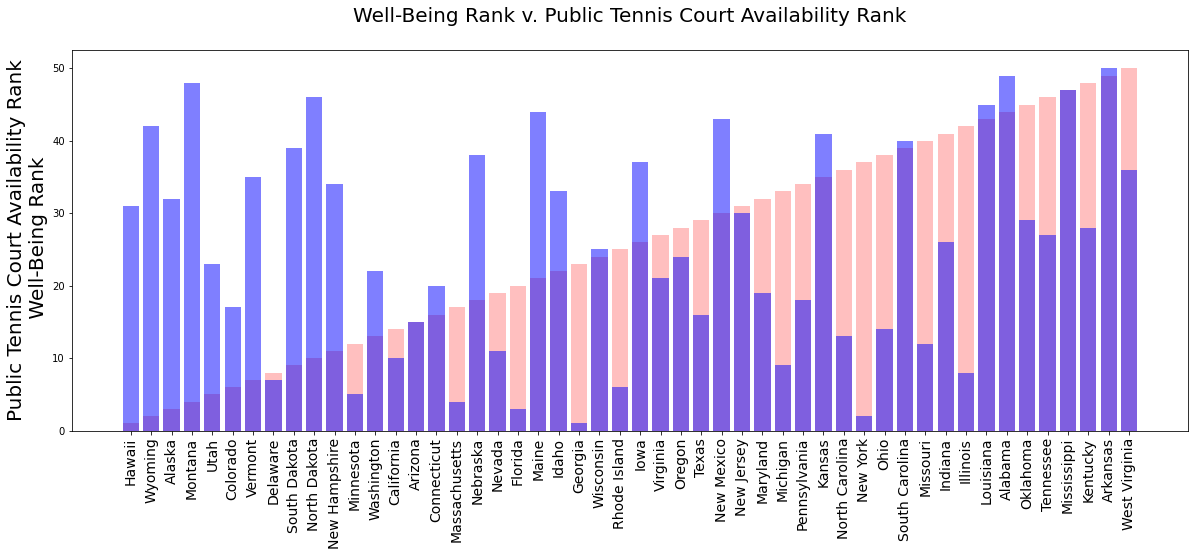

In [12]:

# Set x axis and tick locations
x_axis = np.arange(len(ranking_data_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,7)) # controls figure size
plt.bar(x_axis, consolidated_w_index_df["Well-Being Index Rank"], color = 'r', alpha = .25, align = "center", label = "Well-Being")
plt.bar(x_axis, ranking_data_df["public_courts_rank"], color='b', alpha=0.5, align="center", label = "Availability")
plt.xticks(tick_locations, ranking_data_df["State"], rotation="vertical")

plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=10)
plt.title("Well-Being Rank v. Public Tennis Court Availability Rank\n", fontsize='20')
plt.ylabel('Public Tennis Court Availability Rank\n Well-Being Rank', fontsize='20')



In [13]:
# #Try and get a legend


# # Set x axis and tick locations
# x_axis = np.arange(len(ranking_data_df))
# tick_locations = [value for value in x_axis]

# # Create a list indicating where to write x labels and set figure size to adjust for space
# plt.figure(figsize=(20,7)) # controls figure size
# wb, = plt.bar(x_axis, consolidated_w_index_df["Well-Being Index Rank"], color = 'r', alpha = .25, align = "center", label = "Well-Being")
# pc, = plt.bar(x_axis, ranking_data_df["public_courts_rank"], color='b', alpha=0.5, align="center", label = "Availability")
# plt.xticks(tick_locations, ranking_data_df["State"], rotation="vertical")

# plt.xticks(rotation=90, fontsize=14)
# plt.yticks(fontsize=10)
# plt.title("Well-Being Rank v. Public Tennis Court Availability Rank\n", fontsize='20')
# plt.ylabel('Public Tennis Court Availability Rank\n Well-Being Rank', fontsize='20')

# plt.legend(handles=[wb, pc], loc="best")

In [14]:
# Save the plot and display it
plt.savefig("../Images/well_being_rank_v_public_court_availability_rank_BAR.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

In [15]:
reduced_df = consolidated_w_index_df[["State", "Well-Being Index", "count_public_court_locations", "public_courts_per_10000_people", "public_courts_rank"]]

reduced_df.head(2)

#reduced_df.describe()

,State,Well-Being Index,count_public_court_locations,public_courts_per_10000_people,public_courts_rank
0,Hawaii,64.6,91,0.637973,31
1,Wyoming,64.2,10,0.174301,42


Text(0, 0.5, '# of Public Tennis Court Locations')

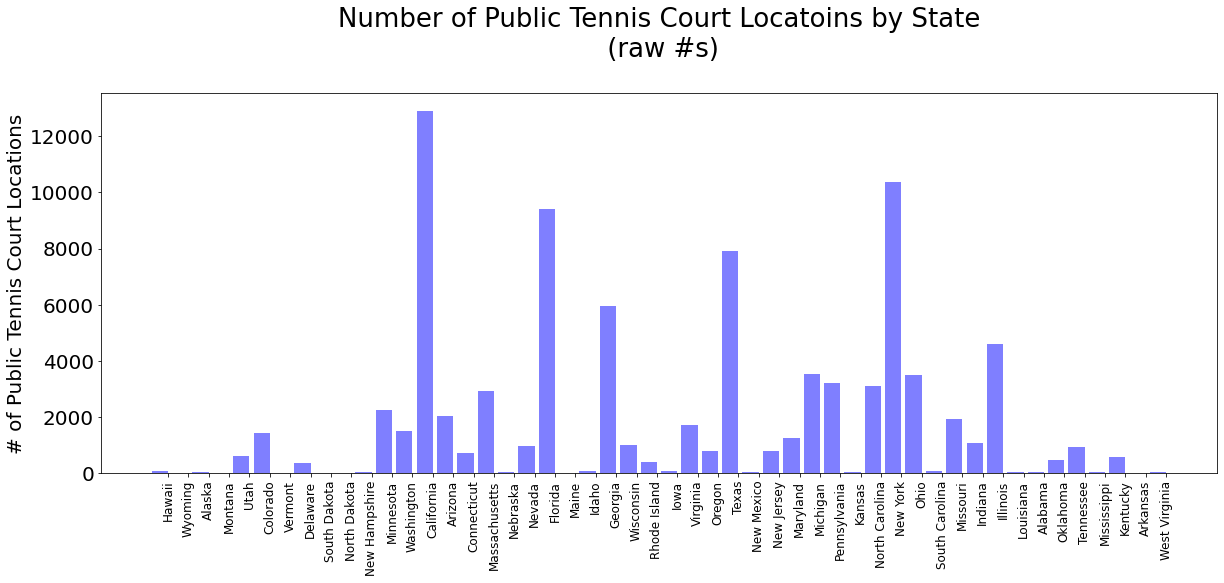

In [16]:
# Set x axis and tick locations
x_axis = np.arange(len(reduced_df))
tick_locations = [value + 0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,7)) # controls figure size
#plt.bar(x_axis, consolidated_w_index_df["Well-Being Index Rank"], color = 'r', alpha = .05, align = "center")
plt.bar(x_axis, reduced_df["count_public_court_locations"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, reduced_df["State"], rotation="vertical")

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=20)
plt.title('Number of Public Tennis Court Locatoins by State\n (raw #s)\n', fontsize='26')
plt.ylabel('# of Public Tennis Court Locations', fontsize='20')


Text(0, 0.5, 'Number of Public Tennis Court Locations')

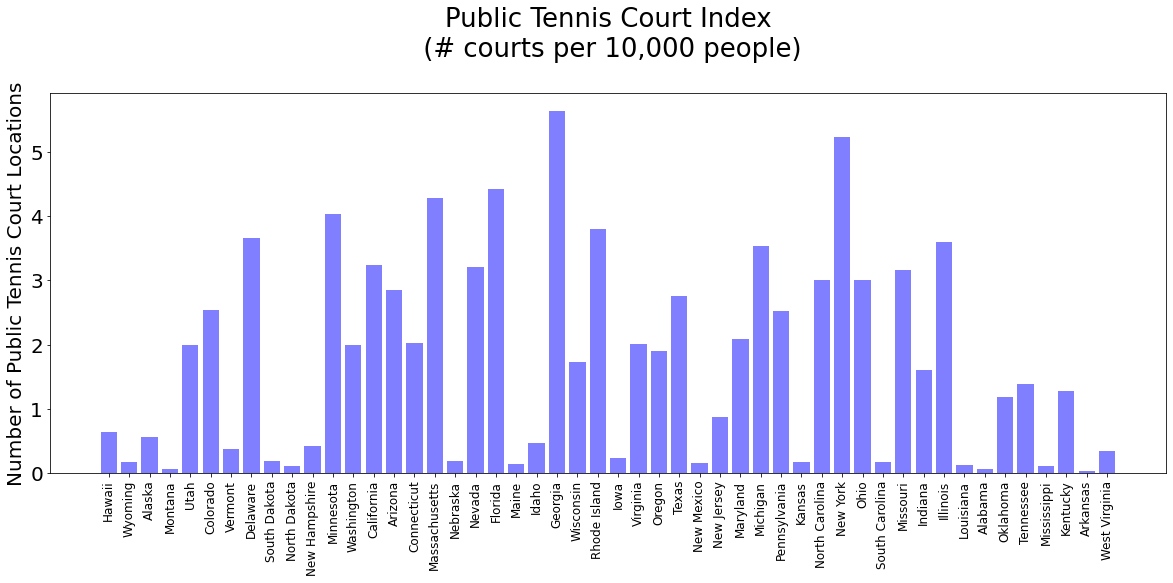

In [17]:
# Set x axis and tick locations
x_axis = np.arange(len(reduced_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,7)) # controls figure size
# plt.plot(x_axis, reduced_df["public_courts_per_10000_people"])
plt.bar(x_axis, reduced_df["public_courts_per_10000_people"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, reduced_df["State"], rotation="vertical")

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=20)
#plt.title("Public Tennis Court Index", fontsize='30')
plt.title('Public Tennis Court Index\n (# courts per 10,000 people)\n', fontsize = 26)
plt.ylabel('Number of Public Tennis Court Locations', fontsize='20')
